In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# โหลดชุดข้อมูลจากไฟล์ CSV
df = pd.read_csv("/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv")

In [33]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [34]:
df.shape

(3900, 19)

In [35]:
# ตรวจสอบข้อมูลว่าแต่ละคอลัมน์มี type อะไรบ้าง และมี missing หรือไม่
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [36]:
cat_cols = ['Gender', 'Category', 'Payment Method', 'Shipping Type'] #สร้างลิสต์ชื่อคอลัมน์ที่เป็นข้อมูลประเภทหมวดหมู่ (categorical columns)
for col in cat_cols:
    df[col] = df[col].astype('category') #วนลูปเปลี่ยน dtype ของแต่ละคอลัมน์ให้เป็น

In [37]:
#ดูว่าเพศใดมียอดใช้จ่ายเฉลี่ยสูงกว่า
df.groupby('Gender')['Purchase Amount (USD)'].mean().sort_values(ascending=False)


/tmp/ipykernel_36/613629022.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['Purchase Amount (USD)'].mean().sort_values(ascending=False)


Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64

In [38]:
#สินค้าใน Category ไหนขายดีที่สุด
df['Category'].value_counts().head(10)


Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [39]:
#ช่องทางการจัดส่ง (Shipping Type) แบบไหนมียอดขายรวมสูงที่สุด
df.groupby('Shipping Type')['Purchase Amount (USD)'].sum()


/tmp/ipykernel_36/2307655724.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Shipping Type')['Purchase Amount (USD)'].sum()


Shipping Type
2-Day Shipping    38080
Express           39067
Free Shipping     40777
Next Day Air      37993
Standard          38233
Store Pickup      38931
Name: Purchase Amount (USD), dtype: int64

In [40]:
#ลูกค้าใช้วิธีการชำระเงินแบบใดมากที่สุด แสดงผลเป็นเปอร์เซ็นต์ (%)
df['Payment Method'].value_counts(normalize=True) * 100


Payment Method
Credit Card      17.846154
Venmo            16.743590
Cash             16.615385
PayPal           16.358974
Debit Card       16.230769
Bank Transfer    16.205128
Name: proportion, dtype: float64

# **K-Mean Clustering**

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# เลือกเฉพาะคอลัมน์ที่ใช้ในการ Clustering
X = df[['Age', 'Purchase Amount (USD)']]

# สเกลข้อมูลให้อยู่ในช่วงเดียวกัน
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


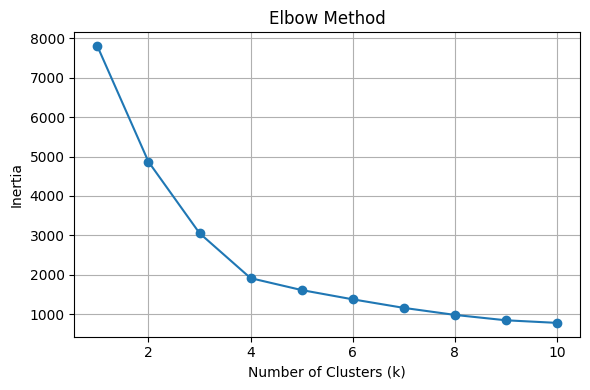

In [42]:
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method
#เพื่อหาค่า k ที่เหมาะสมสำหรับ clustering
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')  
    km.fit(X_scaled)
    inertia.append(km.inertia_)

os.makedirs("images", exist_ok=True)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.savefig("images/elbow_plot.png")
plt.show()


In [45]:
df.groupby('Segment')['Age'].agg(['min', 'max', 'mean']).round(1)
#ช่วงอายุของแต่ละคลัสเตอร์

,min,max,mean
Segment,,,
0,31,70,53.5
1,18,44,28.2
2,32,70,54.1


In [43]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['Segment'] = kmeans.fit_predict(X_scaled)


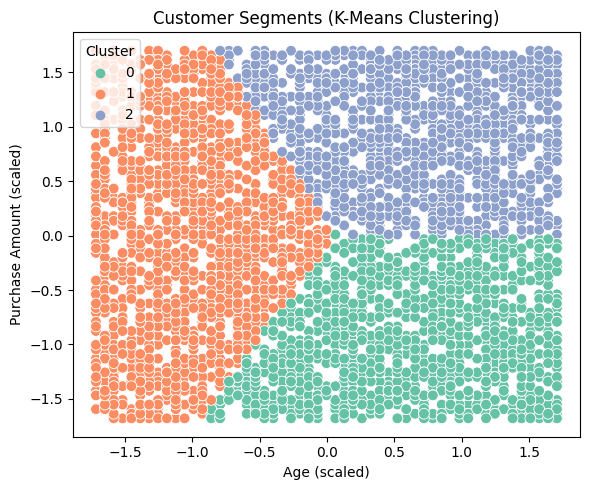

In [44]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=X_scaled[:, 0], 
    y=X_scaled[:, 1], 
    hue=df['Segment'], 
    palette='Set2',
    s=60
)
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Age (scaled)")
plt.ylabel("Purchase Amount (scaled)")
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig("images/kmeans_clusters.png")
plt.show()
